In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

In [100]:
# Camera calibration
def calibrate_camera(images, draw_corners=None):
    '''
    Calibarate the camera with a list of images
    
    Params:
    images: a list of images taken by the camera, used to calibrate the camera
    draw_corners: if true, draw the found corners on the image
    
    Return: camera matrix, distortion coefficient
    '''
    # Two lists to store object and image points
    objpoints = []
    imgpoints = []
    
    # Prepare object points
    objp = np.zeros([6*9, 3], np.float32)
    objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)
    
    # Step through each image
    for fname in images:
        img = mpimg.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        # Find chessboard corners
        ret, corners = cv2.findChessboardCorners(img, (9, 6), None)
        
        # If found corners, add the image points and correponding object points
        if ret is True:
            imgpoints.append(corners)
            objpoints.append(objp)
            
            # If needed, draw the corners on the image
            if draw_corners == True:
                img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
                plt.imshow(img) 
    
    # Calibrate camera with object points and image points
    ret, mtx, dist, rvec, tvec = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2], None, None)
    return mtx, dist   

In [105]:
# Calibrate the camera with calibration images
images = glob.glob('./camera_cal/calibration*.jpg')
mtx, dist = calibrate_camera(images)

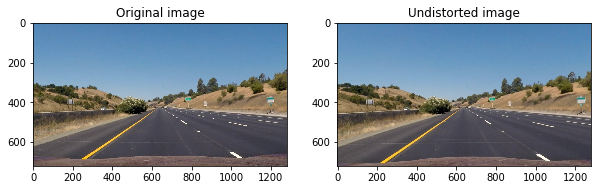

In [129]:
# Test the undistortion function
fl = './test_images/straight_lines1.jpg'
img = mpimg.imread(fl)
undist = cv2.undistort(img, mtx, dist, None, mtx)

fig = plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img)
plt.title('Original image')
plt.subplot(122), plt.imshow(undist)
plt.title('Undistorted image')

In [131]:
# Detect lane lines with gradients thresholds and color thresholds
def detect_line(img, grad_mag_thresh=(30, 100), grad_dir_thresh=(np.pi/4, np.pi/2), color_threshold=(0,255)):
    return None

In [132]:
# Perspective transform
def transform_perspective(img):
    return None

In [133]:
# Find the lines
def find_line(img):
    return None

In [134]:
# Calculate curvature and position
def calculate_curvature(img):
    return None